<a href="https://colab.research.google.com/github/Katherine-Gatica-BS/Portafolio/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso weather AUS**

Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia con el fin de explorar, analizar, transformar, codificar y graficar la información entregada.
El conjunto de datos a utilizar se encuentra en https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

**El dataset posee los siguientes campos:**
* Date → fecha de la observación
* Location  → ubicación de la estación meteorológica
* MinTemp → temperatura mínima en grados Celsius
* MaxTemp → temperatura máxima en grados Celsius
* Rainfall → cantidad de lluvia registrada ese día en mm.
* Evaporation → evaporación (mm) en 24 horas
* Sunshine → número de horas de sol brillante en el día
* WindGustDir → dirección de la ráfaga de viento más fuerte en 24 horas.
* WindGustSpeed → velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.
* WindDir9am → dirección del viento a las 9am
* WindDir3pm → dirección del viento a las 3pm
* WindSpeed9am → velocidad (km/hr) del viento a las 9am
* WindSpeed3pm → velocidad (km/hr) del viento a las 3pm
* Humidity9am → porcentaje de humedad a las 9am
* Humidity3pm → porcentaje de humedad a las 3pm
* Pressure9am → presión atmosférica (hpa) a nivel del mar a las 9am
* Pressure3pm → presión atmosférica (hpa) a nivel del mar a las 3pm
* Cloud9am → fración del cielo cubierto por nubes a las 9am. Se mide en  "octavos", de manera que un valor 0 indica cielo totalmente  despejado y 8, cielo totalmente cubierto.
* Cloud3pm → fración del cielo cubierto por nubes a las 3pm. Se mide en  "octavos", de manera que un valor 0 indica cielo totalmente  despejado y 8, cielo totalmente cubierto.
* Temp9am → temperatura en grados celsius a las 9am
* Temp3pm → temperatura en grados celsius a las 3pm
* RainToday → variable indicadora que toma el valor 1 si la precipitación en mm.  en las últimas 24 hrs. excede 1 mm. y 0 si no.
* RISK_MM  → La cantidad de lluvia. Una especie de medida del "riesgo".
* RainTomorrow → variable indicadora que toma el valor 1 si al día siguiente llovió y 0  si no.

#Exploración inicial

Exportación de librerias, Limpieza de datos y estadísticas.


In [ ]:
#Se exportan las librerías necesarias para el caso.

import numpy as np
from numpy import array
from numpy import argmax
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
from sklearn.feature_selection import SelectKBest
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, f1_score, roc_auc_score, mean_absolute_error,roc_curve, auc,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#Se cargan los datos y lo guardamos en un dataframe

df_weather = pd.read_csv("weatherAUS.csv")
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
#Tamaño del Datafrme
df_weather.shape

(142193, 24)

In [ ]:
#Se valida cuales son los tipos de datos de cada columna del DataFrame
df_weather.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Revisión y transformación de Nulos.**

In [ ]:
#Revisamos si existen datos nullos en el dataframe
df_weather.isnull().any().any()

True

In [ ]:
#Contamos los nulos
for feature in df_weather.columns:
  print ('Total de valores nulos de', feature , '=', df_weather[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

In [ ]:
#Los valores númericos son reemplazados por la media.

df_weather['Humidity9am']=df_weather['Humidity9am'].fillna(df_weather['Humidity9am'].mean())
df_weather['Humidity3pm']=df_weather['Humidity3pm'].fillna(df_weather['Humidity3pm'].mean())
df_weather['Pressure9am']=df_weather['Pressure9am'].fillna(df_weather['Pressure9am'].mean())
df_weather['Pressure3pm']=df_weather['Pressure3pm'].fillna(df_weather['Pressure3pm'].mean())
df_weather['Cloud9am']=df_weather['Cloud9am'].fillna(df_weather['Cloud9am'].mean())
df_weather['Cloud3pm']=df_weather['Cloud3pm'].fillna(df_weather['Cloud3pm'].mean())
df_weather['Temp9am']=df_weather['Temp9am'].fillna(df_weather['Temp9am'].mean())
df_weather['Temp3pm']=df_weather['Temp3pm'].fillna(df_weather['Temp3pm'].mean())
df_weather['MinTemp']=df_weather['MinTemp'].fillna(df_weather['MinTemp'].mean())
df_weather['MaxTemp']=df_weather['MaxTemp'].fillna(df_weather['MaxTemp'].mean())
df_weather['Rainfall']=df_weather['Rainfall'].fillna(df_weather['Rainfall'].mean())
df_weather['Evaporation']=df_weather['Evaporation'].fillna(df_weather['Evaporation'].mean())
df_weather['Sunshine']=df_weather['Sunshine'].fillna(df_weather['Sunshine'].mean())
df_weather['WindGustSpeed']=df_weather['WindGustSpeed'].fillna(df_weather['WindGustSpeed'].mean())

In [ ]:
#Se remplazan los nulos por la moda, ya que son tipo string.
df_weather['WindGustDir']=df_weather['WindGustDir'].fillna(df_weather['WindGustDir'].value_counts().idxmax())
df_weather['WindSpeed9am']=df_weather['WindSpeed9am'].fillna(df_weather['WindSpeed9am'].value_counts().idxmax())
df_weather['WindSpeed3pm']=df_weather['WindSpeed3pm'].fillna(df_weather['WindSpeed3pm'].value_counts().idxmax())
df_weather['WindDir9am']=df_weather['WindDir9am'].fillna(df_weather['WindDir9am'].value_counts().idxmax())
df_weather['WindDir3pm']=df_weather['WindDir3pm'].fillna(df_weather['WindDir3pm'].value_counts().idxmax())
df_weather['RainToday']=df_weather['RainToday'].fillna(df_weather['RainToday'].value_counts().idxmax())

In [ ]:
#Se corrobora que el Dataframe no tengamos más nulos.
for feature in df_weather.columns:
  print('Total de valores nulos de', feature, '=', df_weather[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 0
Total de valores nulos de MaxTemp = 0
Total de valores nulos de Rainfall = 0
Total de valores nulos de Evaporation = 0
Total de valores nulos de Sunshine = 0
Total de valores nulos de WindGustDir = 0
Total de valores nulos de WindGustSpeed = 0
Total de valores nulos de WindDir9am = 0
Total de valores nulos de WindDir3pm = 0
Total de valores nulos de WindSpeed9am = 0
Total de valores nulos de WindSpeed3pm = 0
Total de valores nulos de Humidity9am = 0
Total de valores nulos de Humidity3pm = 0
Total de valores nulos de Pressure9am = 0
Total de valores nulos de Pressure3pm = 0
Total de valores nulos de Cloud9am = 0
Total de valores nulos de Cloud3pm = 0
Total de valores nulos de Temp9am = 0
Total de valores nulos de Temp3pm = 0
Total de valores nulos de RainToday = 0
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0


In [ ]:
# Se vuelve a comprobar los nulos 
df_weather.isnull().any().any()

False

**Transformación de datos String a Int**

In [ ]:
le = LabelEncoder()
df_weather['RainToday'] = le.fit_transform(df_weather['RainToday'])
df_weather['RainTomorrow'] = le.fit_transform(df_weather['RainTomorrow'])
pd.DataFrame(df_weather)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0


#Estadistica descriptiva

In [ ]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,13.954569,18.533303,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.221213,2.360682,0.224181
std,6.388924,7.109554,8.423217,3.168114,2.734927,13.138385,8.864344,8.754566,18.932077,20.532065,6.746248,6.681788,2.278080,2.104709,6.472166,6.870771,0.415065,8.477969,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,7.624853,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,0.000000
50%,12.000000,22.700000,0.000000,5.469824,7.624853,39.000000,13.000000,17.000000,70.000000,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.800000,21.300000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,5.469824,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.800000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,371.000000,1.000000


In [ ]:
df_weather.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm
count,142193,142193,142193,142193,142193
unique,3436,49,16,16,16
top,2013-12-01,Canberra,W,N,SE
freq,49,3418,19110,21406,14441


Visualización de un resumen estadistico

*  Count - Número de observaciones no nulas en la columna
*  Unique - Cantidad de valores unicos
*  Top - valor más común en cada columna de objeto.
*  Freq - frecuencia del valor más común en cada columna de objeto

#Matriz de correlación

<ipython-input-59-f1b9dc658dd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_weather_co = df_weather.corr(method='pearson')


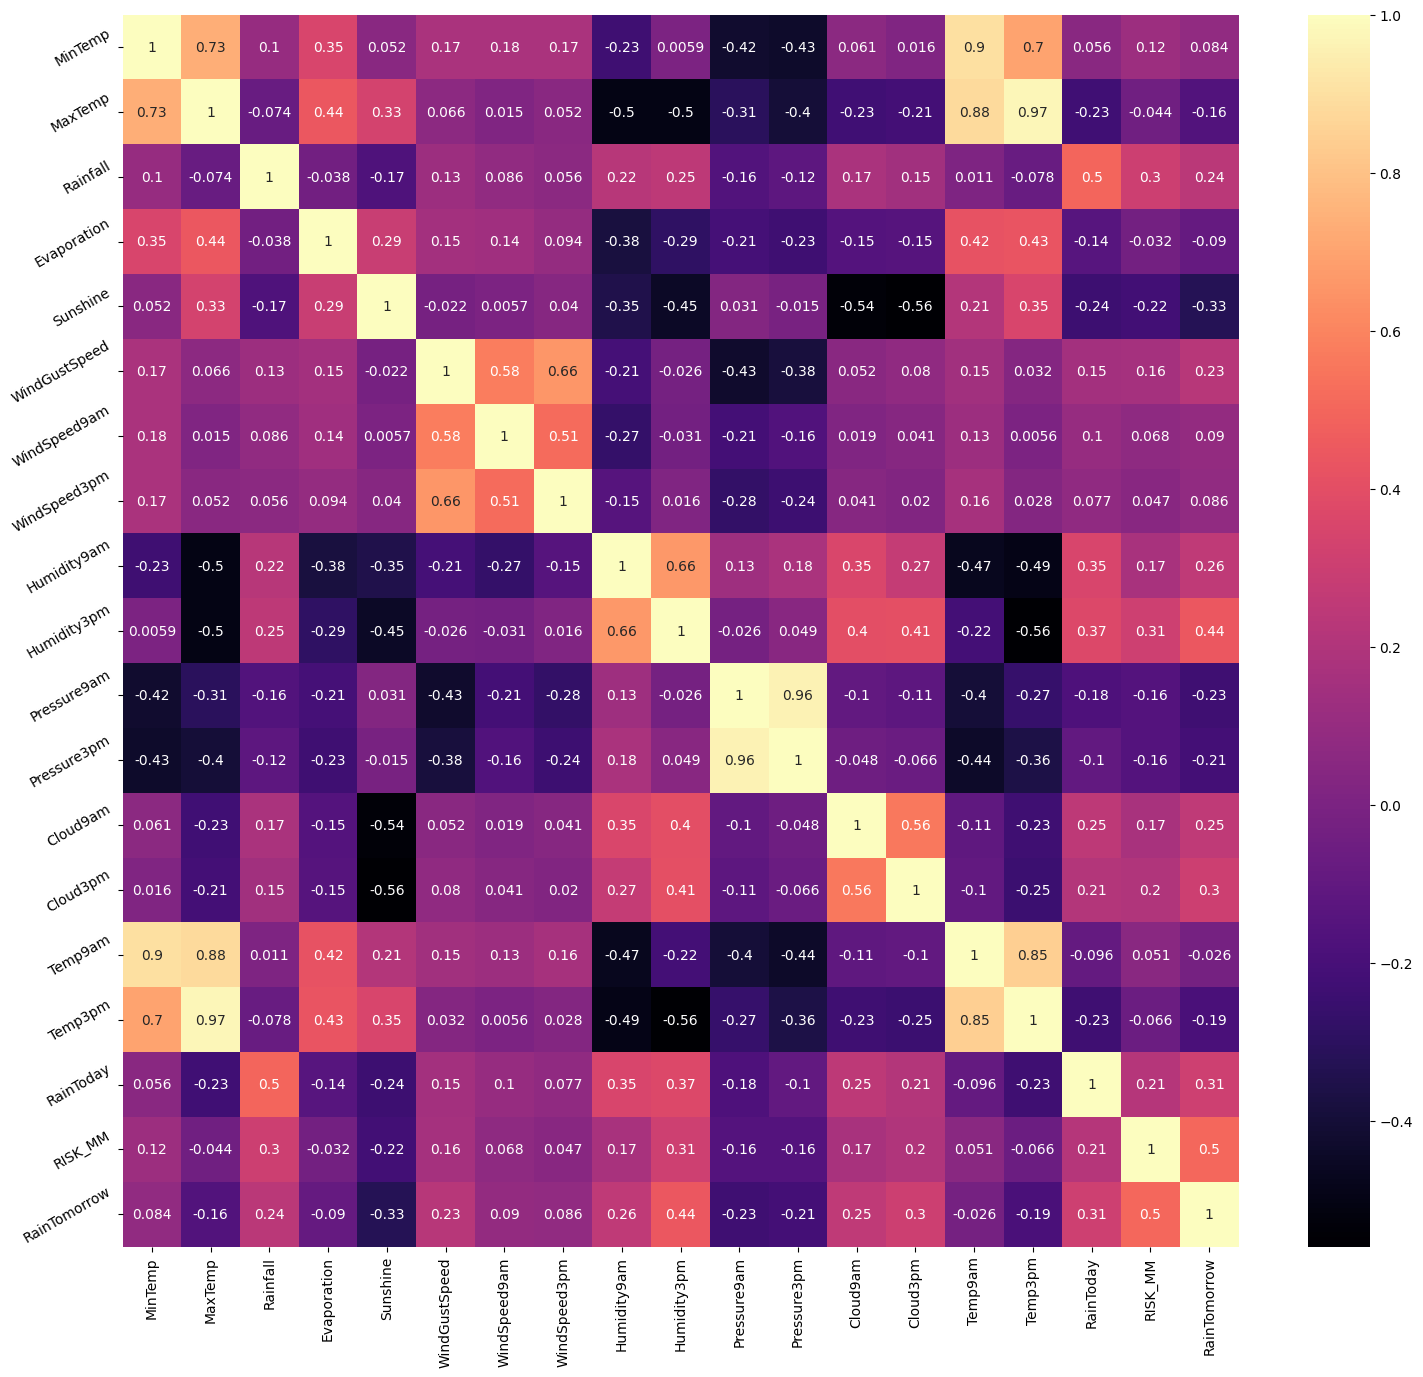

In [ ]:
df_weather_co = df_weather.corr(method='pearson')
plt.figure(figsize=(18, 16))
htMap = sns.heatmap(df_weather_co, annot=True, cmap='magma')
htMap.set_xticklabels(htMap.get_xticklabels(), rotation=90)
htMap.set_yticklabels(htMap.get_yticklabels(), rotation=30)     
plt.show()

Las variables que tienen mas correlacion con la variable RainTomorrow son:
- RainTomorrow ==> 100%
- Humidity3pm ==>  43,9%
- RainToday ==>    30,6%
- Humidity9am ==>  25,5%
- Rainfall ==>     23,6%
- WindGustSpeed ==> 22,5%

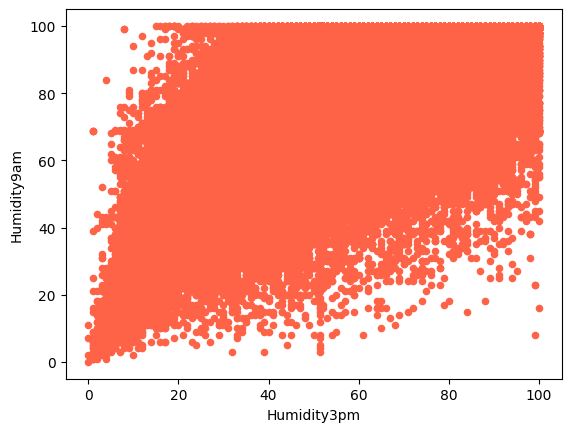

In [ ]:
disp= df_weather.plot(color='tomato',kind='scatter', x='Humidity3pm', y='Humidity9am')

* Accuracy: Proporción de predicciones correctas.
* Recall: Proporción de positivos verdaderos que fueron identificados correctamente.
* F1 Score: Media armónica de la precisión y la exhaustividad.
* AUC-ROC: Área bajo la curva de característica operativa del receptor. Una 
medida de cómo se desempeña el modelo independientemente del umbral de clasificación.

In [ ]:
location_weather_df = df_weather.groupby(['Location'])[['MinTemp', 'MaxTemp']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp
0,Adelaide,12.628082,22.945584
1,Albany,12.933554,20.106053
2,Albury,9.526210,22.631161
3,AliceSprings,13.124872,29.242206
4,BadgerysCreek,11.141201,24.022295


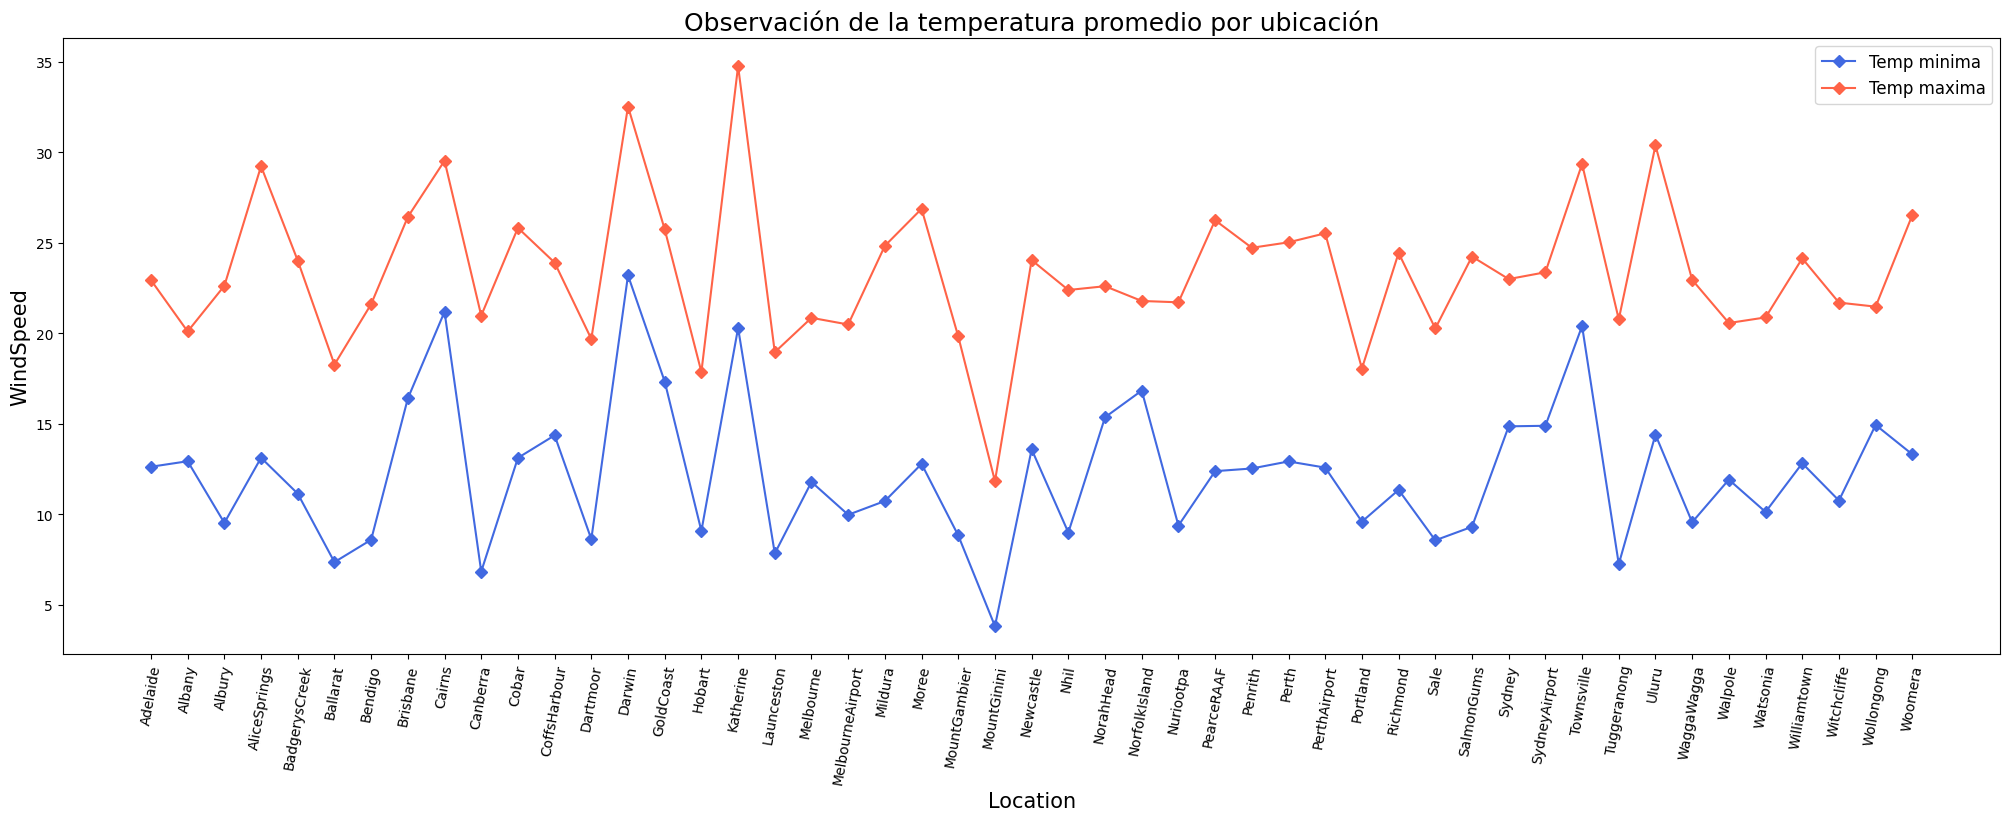

In [ ]:
#Generamos el Grafico
x = location_weather_df.loc[:, 'Location']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']

plt.figure(figsize = (25, 8))

plt.plot(x, y1, marker='D', color = 'royalblue', label = 'Temp minima') 
plt.plot(x, y2, marker='D', color = 'tomato', label = 'Temp maxima')

plt.xlabel('Location', fontsize = 15)
plt.ylabel('WindSpeed', fontsize = 15)
plt.title('Observación de la temperatura promedio por ubicación', fontsize = 18)
plt.legend(fontsize = 12, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Tras el analisis se llega a la conclusión de que las temperaturas en Australia son Altas, ya que el clima predominante es el desértico y semiárido

La temperatura mas alta es de la ubicación Katherine.

In [ ]:
location_weather_df2 = df_weather.groupby(['Location'])[['Humidity9am', 'Temp9am']].mean()
location_weather_df2 = location_weather_df2.reset_index()
location_weather_df2.head()

,Location,Humidity9am,Temp9am
0,Adelaide,59.633404,16.973216
1,Albany,74.729050,16.242159
2,Albury,74.101088,14.352126
3,AliceSprings,39.654085,21.328868
4,BadgerysCreek,76.813344,16.576400


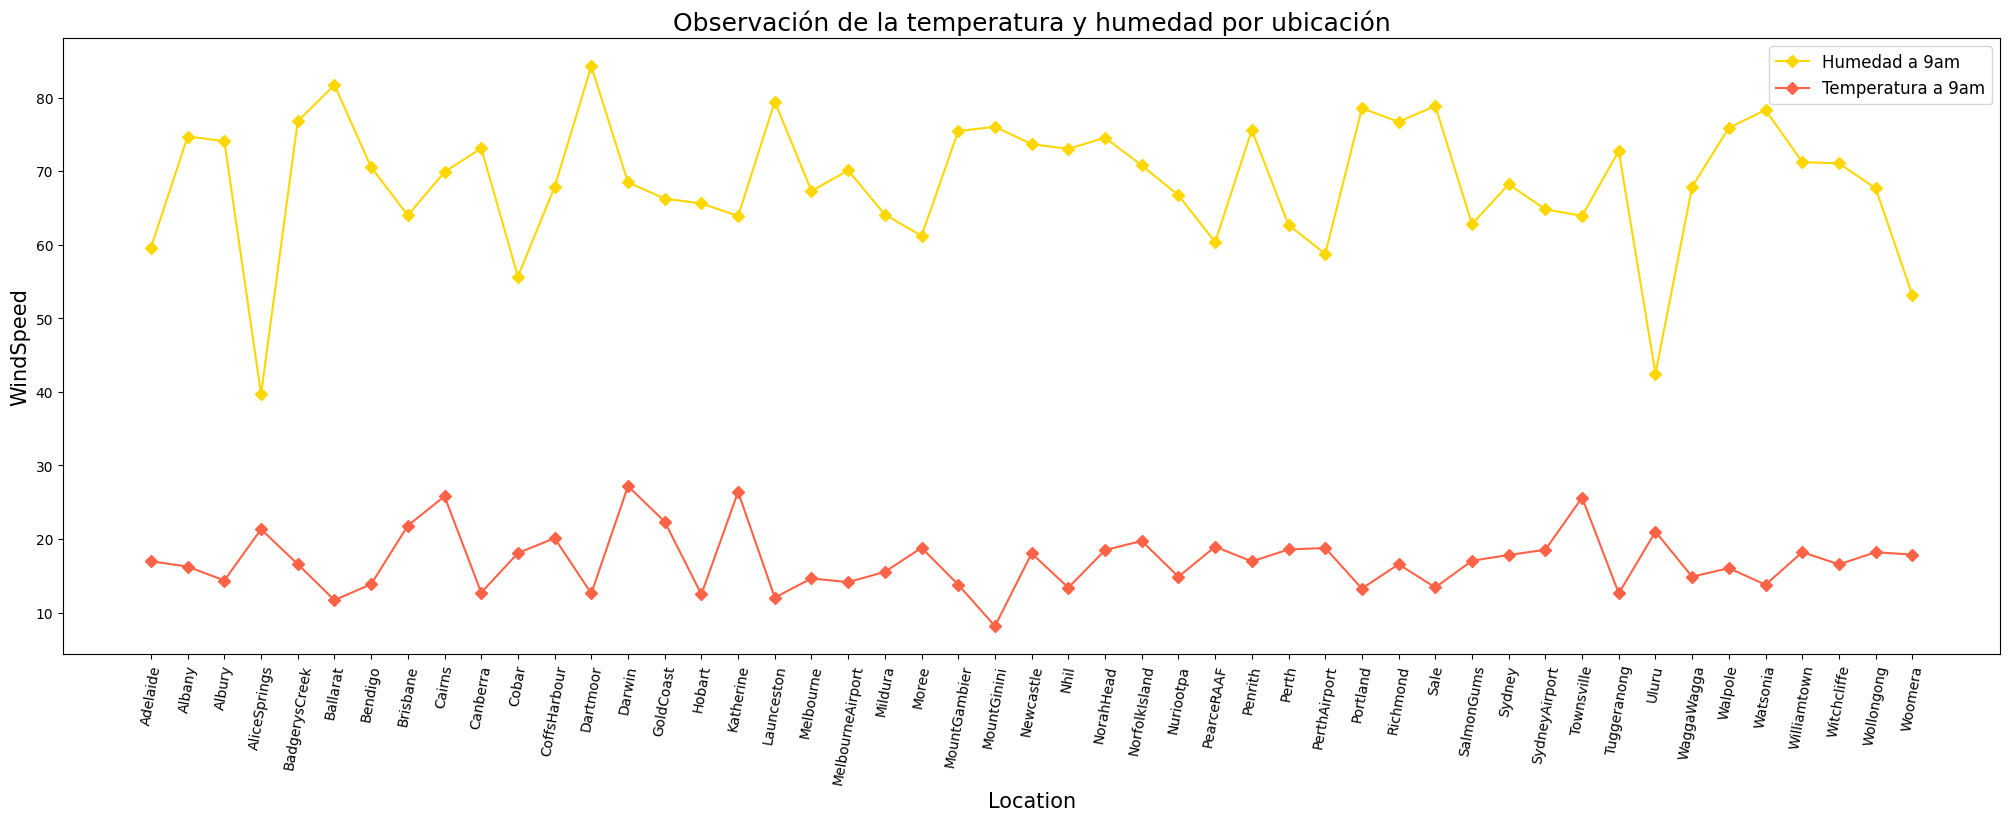

In [ ]:
#Generamos el Grafico
x = location_weather_df2.loc[:, 'Location']
y1 = location_weather_df2['Humidity9am'] 
y2 = location_weather_df2['Temp9am']

plt.figure(figsize = (25, 8))

plt.plot(x, y1, marker='D', color = 'gold', label = 'Humedad a 9am') 
plt.plot(x, y2, marker='D', color = 'tomato', label = 'Temperatura a 9am')

plt.xlabel('Location', fontsize = 15)
plt.ylabel('WindSpeed', fontsize = 15)
plt.title('Observación de la temperatura y humedad por ubicación', fontsize = 18)
plt.legend(fontsize = 12, loc = 'best')
plt.xticks(rotation=80)
plt.show()

In [ ]:
sunshine_weather_df = df_weather.groupby(['Location'])[['Sunshine', 'Cloud9am']].mean()
sunshine_weather_df = sunshine_weather_df.reset_index()
sunshine_weather_df.head()

,Location,Sunshine,Cloud9am
0,Adelaide,7.694723,4.437189
1,Albany,6.820847,5.182129
2,Albury,7.624853,5.269645
3,AliceSprings,9.251996,3.014235
4,BadgerysCreek,7.624853,4.437189


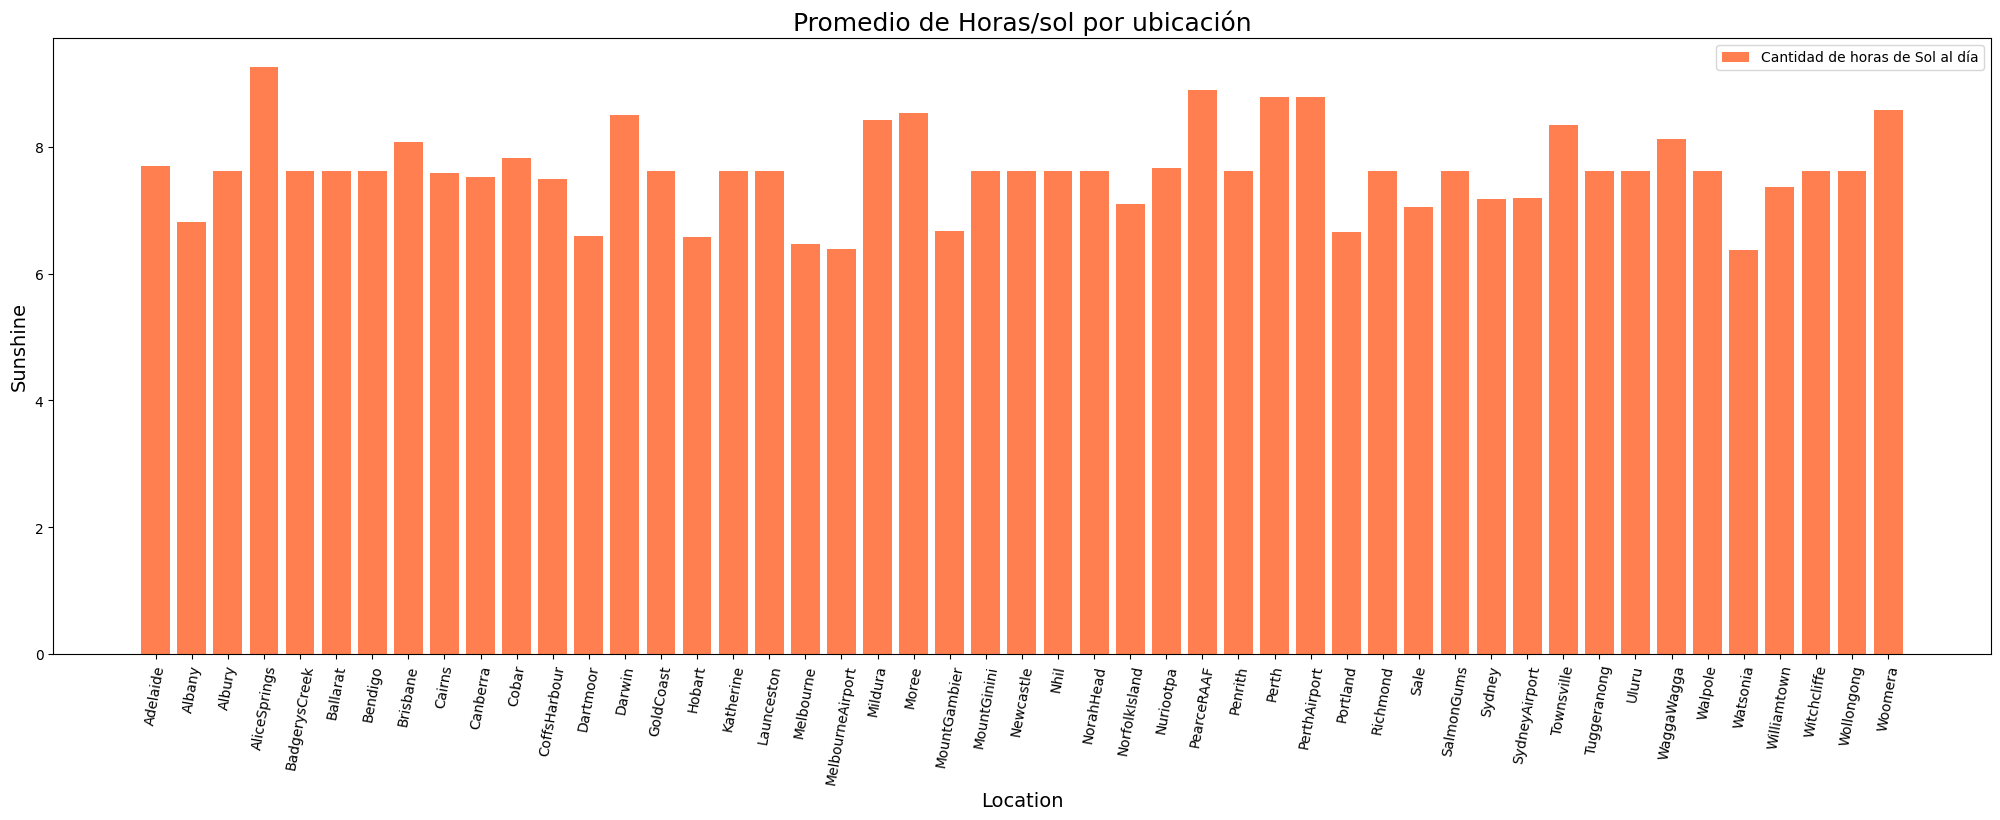

In [ ]:
#Histograma
x = sunshine_weather_df.loc[:, 'Location']
y = sunshine_weather_df['Sunshine'] 

plt.figure(figsize = (25, 8))

plt.bar(x, y, color = 'coral', label = 'Cantidad de horas de Sol al día') 

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Sunshine', fontsize = 14)
plt.title('Promedio de Horas/sol por ubicación', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Las 3 primeras ciudades que registran más de 8 horas sol al día son : AliceSprings, Darwin y Mildura

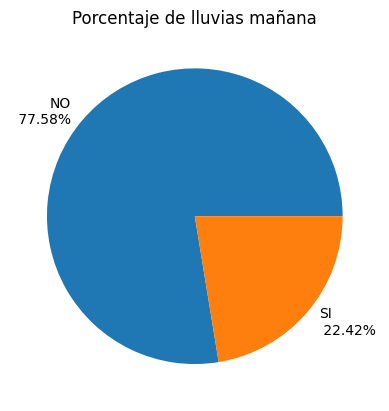

In [ ]:
clases = np.array([df_weather[df_weather.RainTomorrow == 0.0].shape[0],df_weather[df_weather.RainTomorrow == 1.0].shape[0]])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'NO\n ' + labels[0]
labels[1] = 'SI\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de lluvias mañana')
plt.show()

La probabilidad de que mañana haya lluvia es de un 22.42%, Por lo tanto, se puede decir que hay una probabilidad del 77.58% de que no llueva al día siguiente.

<Axes: xlabel='RainToday', ylabel='count'>

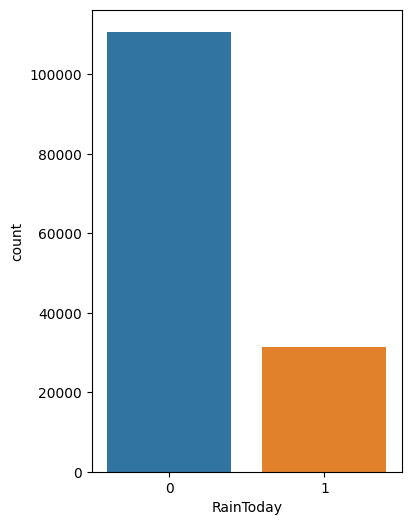

In [ ]:
plt.figure(figsize=(4,6))
sns.countplot(x='RainToday', data=df_weather)

En este grafico se quiere explicar la cantidad de días que ha llovido y la cantidad de días que no ha llovido en el conjunto de datos.

Si en esos 30 días en los que llovió hoy, en 20 de ellos llovió también mañana, ya que la Probabilidad(RainTomorrow='Yes' | RainToday='Yes') = 20/30 = 0.67 o 67%

Esto significa que si ha llovido hoy, hay un 67% de probabilidad de que llueva mañana.

#Entrega 2

##Modelo de regresión lineal simple

In [ ]:
y = df_weather['RainTomorrow'] #Variable dependiente
X = df_weather[['Humidity3pm']] # Variable independiente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

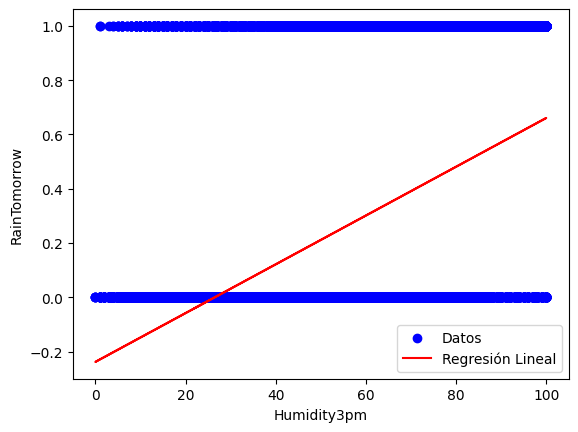

In [ ]:
coef = model.coef_[0]
intercept = model.intercept_
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', label='Datos')
regression_line = X * coef + intercept
ax.plot(X, regression_line, color='red', label='Regresión Lineal')
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('RainTomorrow')
ax.legend()
plt.show()

Conclusión:

Existe una tendencia descendente general en los datos, lo que sugiere una relación inversa entre la humedad a las 3 p.m. y la probabilidad de lluvia al día siguiente.
La línea de regresión lineal representa la mejor estimación lineal de cómo varía la variable dependiente 'RainTomorrow' en función de la variable independiente 'Humidity3pm'.
Sin embargo, la dispersión de los puntos alrededor de la línea de regresión sugiere que el modelo de regresión lineal simple puede no ser capaz de capturar todas las complejidades y variaciones en los datos.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.2f}".format(mse))


Error cuadrático medio (MSE): 0.14


MSE de 0.14 sugiere un buen ajuste del modelo a los datos.

##Modelo de regresión multiple

In [ ]:
y = df_weather['RainTomorrow'] #Variable dependiente
X = df_weather[['Humidity3pm','RainToday','Humidity9am','Rainfall','WindGustSpeed']] # Variable independiente

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

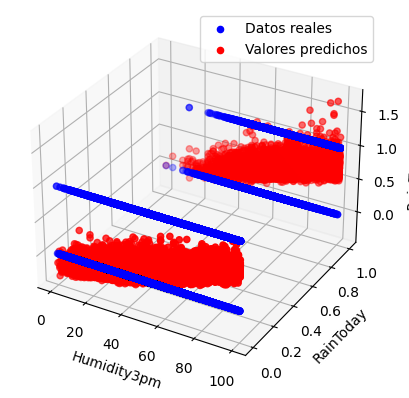

In [ ]:


# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos reales
ax.scatter(X_test['Humidity3pm'], X_test['RainToday'], y_test, color='blue', label='Datos reales')

# Predecir los valores con el modelo
y_pred = model.predict(X_test)

# Graficar los valores predichos
ax.scatter(X_test['Humidity3pm'], X_test['RainToday'], y_pred, color='red', label='Valores predichos')

# Configurar los ejes
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('RainToday')
ax.set_zlabel('RainTomorrow')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


Conclusion:

Los puntos azules representan los datos reales, que corresponden a los valores observados de 'RainTomorrow' en función de 'Humidity3pm' y 'RainToday'.
Los puntos rojos representan los valores predichos por el modelo de regresión lineal múltiple para los mismos valores de 'Humidity3pm' y 'RainToday'.
Si los puntos rojos se ajustan cercanamente a los puntos azules, indica que el modelo de regresión lineal múltiple puede realizar buenas predicciones y capturar la relación entre las variables.
Si hay una dispersión significativa entre los puntos rojos y azules, indica que el modelo puede tener dificultades para capturar las variaciones y complejidades en los datos reales.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.2f}".format(mse))

Error cuadrático medio (MSE): 0.13


Un MSE de 0.13 indica un buen ajuste del modelo a los datos.

##Comparando modelos de Regresión

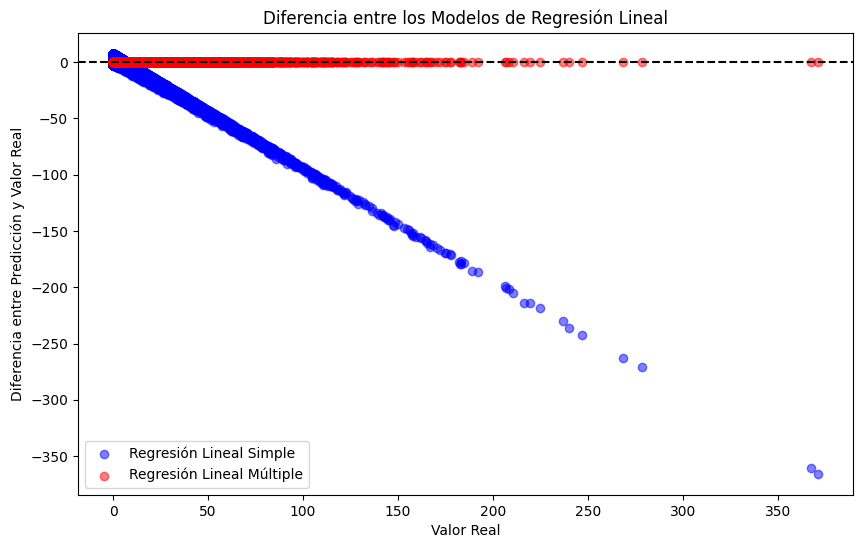

Error cuadrático medio (MSE) - Regresión Lineal Simple:  66.52958130991803
Error cuadrático medio (MSE) - Regresión Lineal Múltiple:  8.70276021855206e-30


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Definir las variables dependientes e independientes para el modelo de regresión simple
y_simple = df_weather['Rainfall']  # Variable dependiente para el modelo simple
X_simple = df_weather[['Humidity3pm']]  # Variable independiente para el modelo simple

# Definir las variables dependientes e independientes para el modelo de regresión múltiple
y_multiple = df_weather['Rainfall']  # Variable dependiente para el modelo múltiple
X_multiple = df_weather[['Humidity3pm', 'RainToday', 'Humidity9am', 'Rainfall', 'WindGustSpeed']]  # Variables independientes para el modelo múltiple

# Crear una instancia del modelo de regresión lineal simple y ajustarlo a los datos
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# Crear una instancia del modelo de regresión lineal múltiple y ajustarlo a los datos
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y_multiple)

# Obtener las predicciones de ambos modelos
predictions_simple = model_simple.predict(X_simple)
predictions_multiple = model_multiple.predict(X_multiple)

# Calcular el error cuadrático medio para cada modelo
mse_simple = mean_squared_error(y_simple, predictions_simple)
mse_multiple = mean_squared_error(y_multiple, predictions_multiple)

# Crear el gráfico de diferencia entre los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_simple, predictions_simple - y_simple, color='blue', alpha=0.5, label='Regresión Lineal Simple')
plt.scatter(y_multiple, predictions_multiple - y_multiple, color='red', alpha=0.5, label='Regresión Lineal Múltiple')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Diferencia entre Predicción y Valor Real')
plt.title('Diferencia entre los Modelos de Regresión Lineal')
plt.legend()
plt.show()

# Imprimir el error cuadrático medio para cada modelo
print("Error cuadrático medio (MSE) - Regresión Lineal Simple: ", mse_simple)
print("Error cuadrático medio (MSE) - Regresión Lineal Múltiple: ", mse_multiple)


## Hipotesis
El modelo de Regresión Lineal Múltiple tiene una capacidad predictiva más precisa y confiable en la predicción de si lloverá mañana en comparación con el modelo de Regresión Lineal Simple. Esto sugiere que las variables adicionales utilizadas en el modelo de Regresión Lineal Múltiple (como la humedad, la lluvia previa, la velocidad del viento, etc.) proporcionan información relevante y contribuyen a una mejor predicción del clima.

## Conclusión 

El MSE obtenido es de 66,53. 
Esto indica que dado que el MSE es relativamente alto, podemos inferir que el modelo de regresión lineal simple no se ajusta muy bien a los datos. Es probable que este modelo no esté capturando de manera adecuada la relación entre las variables independientes y la variable dependiente.

El MSE obtenido es extremadamente bajo, de 8.71. 
Este valor cercano a cero indica que el modelo de regresión lineal múltiple se ajusta prácticamente de forma perfecta a los datos de entrenamiento.

## Modelo de Regresion logistica - Clasificacion

In [ ]:
y = df_weather['RainTomorrow'] #Variable dependiente
X = df_weather[['Humidity3pm','RainToday','Humidity9am','Rainfall','WindGustSpeed']] # Variable independiente

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión logística y ajustarlo a los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 83.31%


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Predicciones del modelo
predictions = model.predict(X_test)

# Cálculo de métricas
accuracy1 = accuracy_score(y_test, predictions)
recall1 = recall_score(y_test, predictions)
f1_score1 = f1_score(y_test, predictions)
roc_auc1 = roc_auc_score(y_test, predictions)

# Impresión de métricas
print("Modelo Regresión Logística\n\nAccuracy = {}\nRecall = {}\nF1 Score = {}\nAUC-ROC = {}".format(accuracy1, recall1, f1_score1, roc_auc1))


Modelo Regresión Logística

Accuracy = 0.8331164949541123
Recall = 0.44125532250433686
F1 Score = 0.5410945658479985
AUC-ROC = 0.6934080033645769


**Accuracy** (Precisión): El modelo tiene una precisión del 83.31%. Esto indica que el 83.31% de las predicciones realizadas por el modelo fueron correctas.

**Recall**: El valor de recall es de 0.441, lo que significa que el modelo pudo identificar correctamente el 44.13% de los casos positivos en relación con el total de casos positivos reales.

**F1 Score**: El valor del F1 Score es de 0.541. Esta métrica combina la precisión y el recall en un solo valor. Un F1 Score más alto indica un mejor equilibrio entre la precisión y el recall.

**AUC-ROC**: El valor del AUC-ROC es de 0.693, lo que indica que el modelo tiene una capacidad razonable para discriminar entre las clases positiva y negativa. Un valor más cercano a 1 indica un mejor rendimiento en la capacidad de clasificación del modelo.

##Modelo de Árbol de decision - Clasificaciones

In [ ]:
#crear una instancia 
modelDTC =  DecisionTreeClassifier()
#Entrenar el modelo
modelDTC.fit(X_train, y_train)
# Realizar predicciones
predictions2 = modelDTC.predict(X_test)

In [ ]:
# Calcular métricas para el segundo modelo
accuracy2 = accuracy_score(y_test, predictions2)
recall2 = recall_score(y_test, predictions2)
f1_score2 = f1_score(y_test, predictions2)
roc_auc2 = roc_auc_score(y_test, predictions2)

#  métricas
print("Modelo Arboles de decision \n\n Accuracy = {} \n Recall = {} \n F1 Score = {} \n AUC-ROC = {}".format(accuracy2, recall2, f1_score2, roc_auc2))


Modelo Arboles de decision 

 Accuracy = 0.7715461162488132 
 Recall = 0.4655417126636177 
 F1 Score = 0.4760906378517862 
 AUC-ROC = 0.6624477501683551


## Comparando ambos modelos de clasificación

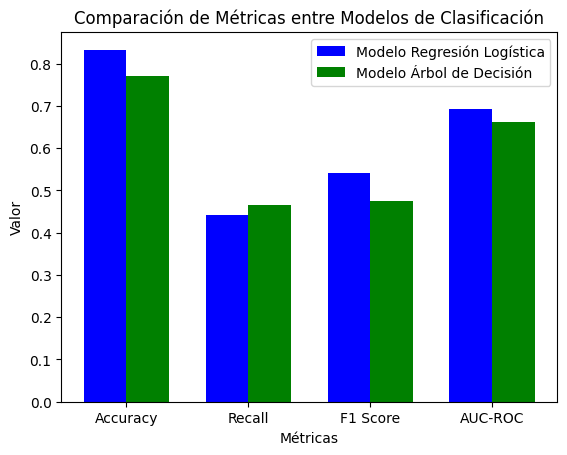

In [ ]:

# Definir las métricas y sus valores para ambos modelos
metrics = ['Accuracy', 'Recall', 'F1 Score', 'AUC-ROC']
model1_values = [accuracy1, recall1, f1_score1, roc_auc1]
model2_values = [accuracy2, recall2, f1_score2, roc_auc2]

# Configurar la posición de las barras
bar_width = 0.35
index = np.arange(len(metrics))

# Crear las barras para cada modelo
plt.bar(index, model1_values, bar_width, label='Modelo Regresión Logística', color='blue')
plt.bar(index + bar_width, model2_values, bar_width, label='Modelo Árbol de Decisión', color='green')

# Configurar los ejes y el título
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos de Clasificación')
plt.xticks(index + bar_width/2, metrics)
plt.legend()

# Mostrar el gráfico de barras
plt.show()


Accuracy (Precisión): Mide la proporción de predicciones correctas en relación con el total de predicciones realizadas. Es una medida general de qué tan bien el modelo clasifica correctamente los ejemplos.

Recall (Recuperación o Sensibilidad): Mide la proporción de casos positivos que fueron correctamente identificados por el modelo. Es una medida de qué tan bien el modelo identifica los ejemplos positivos.

F1 Score: Es una medida que combina tanto el recall como la precisión en una sola métrica. Proporciona un equilibrio entre ambas medidas y es útil cuando el conjunto de datos está desequilibrado en términos de las clases.

AUC-ROC (Area Under the Receiver Operating Characteristic curve): Es una medida que evalúa el rendimiento de un modelo de clasificación en diferentes umbrales de clasificación. Representa la capacidad del modelo para distinguir entre clases positivas y negativas. Un valor más alto de AUC-ROC indica un mejor rendimiento del modelo.

In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión - Modelo de Árboles de Decisión
cm_dtc = confusion_matrix(y_test, predictions2)
print("Matriz de confusión - Modelo de Árboles de Decisión:")
print(cm_dtc)

# Matriz de confusión - Modelo de Regresión Logística
cm_lr = confusion_matrix(y_test, predictions)
print("Matriz de confusión - Modelo de Regresión Logística:")
print(cm_lr)



Matriz de confusión - Modelo de Árboles de Decisión:
[[18990  3108]
 [ 3389  2952]]
Matriz de confusión - Modelo de Regresión Logística:
[[20895  1203]
 [ 3543  2798]]



El modelo de Regresión Logística presenta un menor número de falsos positivos y falsos negativos en comparación con el modelo de Árboles de Decisión. Esto sugiere que el modelo de Regresión Logística tiene un mejor rendimiento en la clasificación de los casos.

# Hipotesis
Ambos modelos presentan un número significativo de falsos negativos, lo que indica que tienden a predecir que no lloverá cuando en realidad sí lloverá. Esto podría deberse a la complejidad y variabilidad de los factores que influyen en las condiciones meteorológicas y la dificultad de capturarlos de manera precisa con los datos disponibles.

#Conclusión

**Modelos de regresión:**
De acuerdo al error cuadratico medio de ambos modelos de regresión, inferimos que el modelo de regresión lineal simple no se ajusta muy bien a los datos. 

Por el contrario, de acuerdo al MSE del modelo de regresión lineal multiple indica que se ajusta prácticamente de forma perfecta a los datos de entrenamiento. El análisis del gráfico de dispersión revela que las predicciones del modelo de regresión lineal múltiple (puntos rojos) exhiben una estrecha proximidad a los valores reales (puntos azules). Esto sugiere que el modelo de regresión lineal múltiple tiene la capacidad de realizar predicciones precisas sobre si lloverá mañana. La cercanía de los puntos rojos a los puntos azules indica un buen ajuste del modelo a los datos observados, lo cual es un indicio positivo de su capacidad predictiva. Estos resultados respaldan la confianza en la idoneidad del modelo de regresión lineal múltiple para predecir la ocurrencia de lluvias en base a las variables independientes consideradas en el análisis.



**Modelos de clasificación:**
De acuerdo a los gráficos, modelo de Regresión Logística tiene un rendimiento general en términos de precisión, capacidad para identificar correctamente los casos positivos, equilibrio entre precisión y recall, y capacidad de discriminación entre las clases.

Por lo tanto, en base a las métricas analizadas, el modelo de Regresión Logística sería considerado como el más adecuado.